<a href="https://colab.research.google.com/github/zqiaohe/100daysofcoding/blob/master/%D0%94%D0%B5%D0%BD%D1%8C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Овечки](https://kulturologia.ru/files/u18046/Blacknose-Sheep-16.jpg)

# **План на день первый:**


*   PyTorch
*   Скачать Анаконду на этот комп +
*   Сделать специальный репозиторий для подобной плановой фигни
*   Описать себе подробно прототип кинотеатра и образовательного сайта по китайскому
*   Сделать степиковский питонмашобуч один модуль и сохранить код в специальный ноутбук




![alt text](https://images2.popmeh.ru/upload/img_cache/dc8/dc850367cc0567661c05a5af00c23781_fitted_800x3000.jpg)

##PyTorch:
* [Основы PyTorch ](https://colab.research.google.com/drive/1XENw9khgtftfaCB5P3CzyxLnAWLX2MX1)
*  [Один нейрон на PyTorch](https://colab.research.google.com/drive/1YTX4LCOcrzNy_UTyMjYG8cBHFiTAVcZy)
*  [Сетка на PyTorch](https://colab.research.google.com/drive/1VBGpsN1n70YHtGPOzQsMkf9-AOzqBb-3#scrollTo=nJblXqY5YJdE)


###База:

In [0]:
# Для того, чтобы "import torch" работал в колабе
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch


In [0]:
torch.HalfTensor      # 16 бит, с плавающей точкой
torch.FloatTensor     # 32 бита,  с плавающей точкой
torch.DoubleTensor    # 64 бита, с плавающей точкой

torch.ShortTensor     # 16 бит, целочисленный, знаковый
torch.IntTensor       # 32 бита, целочисленный, знаковый
torch.LongTensor      # 64 бита, целочисленный, знаковый

torch.CharTensor      # 8 бит, целочисленный, знаковый
torch.ByteTensor      # 8 бит, целочисленный, беззнаковый

torch.ByteTensor

In [0]:
x = torch.IntTensor(3, 2, 4) # сохдание тензора определённой формы, заполненного рандомно
x

In [0]:
x = torch.IntTensor(3, 2, 4).zero_() #то же, но заполненного нулями
x

In [0]:
x = torch.FloatTensor(2,3,4) 
x

In [0]:
x = torch.IntTensor(45, 57, 14, 2) # посмотреть форму тензора
x.shape

In [0]:
b = torch.FloatTensor([[1,2,3], [4,5,10000000000]])
b

In [0]:
b.view(3, 2) #изменить форму *создаёт новый тензор*

In [0]:
b.view(-1)

In [0]:
b.type_as(torch.ByteTensor()) #изменение типа тензора

In [0]:
a = torch.FloatTensor([[100, 20, 35], [15, 163, 534], [52, 90, 66]])
a

###Задача 1
1. Создайте два вещественных тензора: a размером (3, 4) и b размером (12,)
2. Создайте тензор c, являющийся тензором b, но размера (2, 2, 3)
3. Выведите первый столбец матрицы a с помощью индексации

In [0]:
a = torch.FloatTensor(3,4) #1.1 задание
a

tensor([[0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000]])

In [0]:
b = torch.FloatTensor(12,) #1.2
b

In [0]:
c = b.view(2,2,3) #2 задание
c

tensor([[[0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000]]])

In [0]:
a[0:3, 0:1]

tensor([[0.0000],
        [0.0000],
        [0.0000]])

**Арифметика и булевы операции** работаю также, как и в NumPy, **НО** лучше использовать не опреаторы `+`, `-`, `*`, `/`, а их аналоги:  

| Оператор | Аналог |
|:-:|:-:|
|`+`| `torch.add()` |
|`-`| `torch.sub()` |
|`*`| `torch.mul()` |
|`/`| `torch.div()` |

In [0]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [0]:
a.add(b)

In [0]:
a.sub(b)

In [0]:
a.mul(b)

In [0]:
a.div(b)

### Задача 2
1. Создайте два вещественных тензора: `a` размером (5, 2) и `b` размером (1,10)   
2. Создайте тензор `c`, являющийся тензором `b`, но размера (5, 2)  
3. Произведите все арифметические операции с тензорами `a` и `c`

In [0]:
a = torch.FloatTensor([[0, 0],[1, 1],[2, 2],[3, 3],[4, 4]])
b = torch.FloatTensor([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1])
a

tensor([[0., 0.],
        [1., 1.],
        [2., 2.],
        [3., 3.],
        [4., 4.]])

In [0]:
c = b.view(5,2)
c

tensor([[-1., -1.],
        [-1., -1.],
        [-1., -1.],
        [-1., -1.],
        [-1., -1.]])

In [0]:
a.add(c)

tensor([[-1., -1.],
        [ 0.,  0.],
        [ 1.,  1.],
        [ 2.,  2.],
        [ 3.,  3.]])

In [0]:
a.sub(c)

tensor([[1., 1.],
        [2., 2.],
        [3., 3.],
        [4., 4.],
        [5., 5.]])

In [0]:
a.div(c)

tensor([[-0., -0.],
        [-1., -1.],
        [-2., -2.],
        [-3., -3.],
        [-4., -4.]])

In [0]:
a.mul(c)

tensor([[-0., -0.],
        [-1., -1.],
        [-2., -2.],
        [-3., -3.],
        [-4., -4.]])

**Операторы сравнения**:

In [0]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [0]:
a == b

tensor([[0, 0, 0],
        [0, 0, 0],
        [1, 1, 1]], dtype=torch.uint8)

In [0]:
a != b

tensor([[1, 1, 1],
        [1, 1, 1],
        [0, 0, 0]], dtype=torch.uint8)

In [0]:
a < b

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]], dtype=torch.uint8)

In [0]:
a > b

tensor([[1, 1, 1],
        [1, 1, 1],
        [0, 0, 0]], dtype=torch.uint8)

**Булевы маски**:

In [0]:
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

In [0]:
b

tensor([[ -1.,  -2.,  -3.],
        [-10., -20., -30.],
        [100., 200., 300.]])

In [0]:

a[a > b]

tensor([ 1.,  2.,  3., 10., 20., 30.])

In [0]:
b[a == b]

tensor([100., 200., 300.])

**Стандартные функции**:

In [0]:
a.sin()

tensor([[ 0.8415,  0.9093,  0.1411],
        [-0.5440,  0.9129, -0.9880],
        [-0.5064, -0.8733, -0.9998]])

In [0]:
torch.sin(a)

tensor([[ 0.8415,  0.9093,  0.1411],
        [-0.5440,  0.9129, -0.9880],
        [-0.5064, -0.8733, -0.9998]])

In [0]:
a.cos()

tensor([[ 0.5403, -0.4161, -0.9900],
        [-0.8391,  0.4081,  0.1543],
        [ 0.8623,  0.4872, -0.0221]])

In [0]:
a.exp()

tensor([[2.7183e+00, 7.3891e+00, 2.0086e+01],
        [2.2026e+04, 4.8517e+08, 1.0686e+13],
        [       inf,        inf,        inf]])

In [0]:
a.log()

tensor([[0.0000, 0.6931, 1.0986],
        [2.3026, 2.9957, 3.4012],
        [4.6052, 5.2983, 5.7038]])

In [0]:
b.abs()

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

**Сумма, среднее, максимум, минимум**:

In [0]:
a.sum()

tensor(666.)

In [0]:
a.mean()

tensor(74.)

In [0]:
a.sum(0) # по вертикальной оси

tensor([111., 222., 333.])

In [0]:
a.sum(1)

tensor([  6.,  60., 600.])

In [0]:
a.max()

tensor(300.)

In [0]:
a.min(0)

(tensor([1., 2., 3.]), tensor([0, 0, 0]))

###Задача 3

Создайте тензор a размерности (100, 780, 780, 3) (можно интерпретировать это как 100 картинок размера 780х780 с тремя цветовыми каналами) и выведите первый элемент этого тензора как картинку (с помощью matplotlib.pyplot).

Выведите среднее элементов по 1-ой оси (по сути - средняя картинка по всем картинкам) и по 4-ой оси (по сути - усреднение каналов для каждой картинки).

In [0]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

In [0]:
a = torch.FloatTensor(100,780,780,3)

In [0]:
a.mean(0).shape

torch.Size([780, 780, 3])

In [0]:
images = np.random.uniform(0,1, (10000,80,80,1))

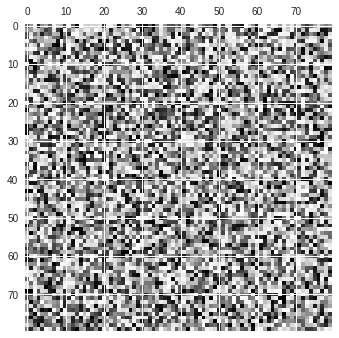

In [0]:
img = images[0].reshape(80,80)
plt.matshow(img)
plt.show()

In [0]:
Meann = images.mean(0)

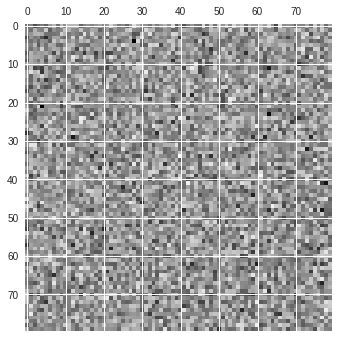

In [0]:
Meann = Meann.reshape(80,80)
plt.matshow(Meann)
plt.show()

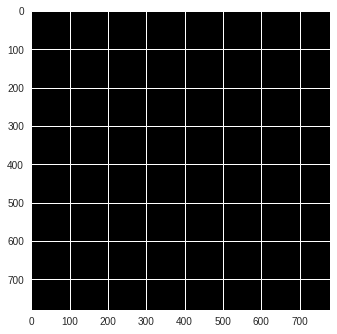

In [0]:
plt.imshow(a[0])
plt.show()

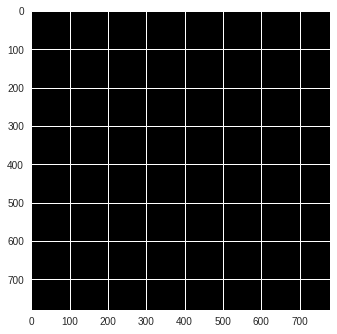

In [0]:
plt.imshow(a.mean(0))
plt.show()

TypeError: ignored

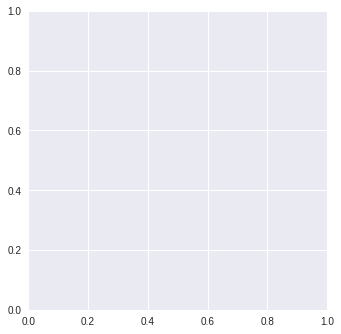

In [0]:
plt.imshow(a.mean(3))
plt.show()

### Задача 4
Напишите функцию `forward_pass(X, w)` ($w_0$ входит в $w$) для одного нейрона (с сигмоидой) с помощью PyTorch (у вас уже должен быть код на NumPy).

In [0]:
def forward_pass(X, w):
    # Ваш код здесь
    b = torch.FloatTensor(X.shape).uniform_()
    return (X @ w).add_(b)

In [0]:
X = torch.FloatTensor([[-5, 5], [2, 3], [1, -1]])
w = torch.FloatTensor([[-0.5], [2.5]])
result = forward_pass(X, w)
print('result: {}'.format(result))
b = torch.FloatTensor(X.shape).uniform_()
b

RuntimeError: ignored

Должно получиться: 

|variable|value|
|-|-|
|**X**|torch.FloatTensor([[-5, 5], [15, 20], [100, -700]])|
|**w**|torch.FloatTensor([[-0.5], [150]])|
|**result**|torch.FloatTensor([[1.0000], [0.9985], [0.0474]])|   